In [1]:
from mxnet import metric
import numpy as np
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import nd

In [2]:
def fn(input):
    return np.sin(input)

def fn2(input):
    #return np.full(shape=input.shape, fill_value=0)
    return input * .001

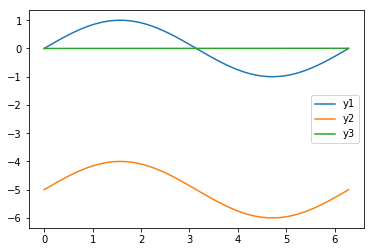

In [3]:
x1 = np.linspace(0, 2*np.pi)
y1 = fn(x1);
y2 = fn(x1) - 5
y3 = fn2(x1) 

plt.plot(x1, y1, x1, y2, x1, y3)
plt.legend(['y1', 'y2', 'y3'])

In [4]:
Y1 = nd.array(y1)
Y2 = nd.array(y2)
Y3 = nd.array(y3)

# RMSE between Y1, Y2

('rmse', 5.0)

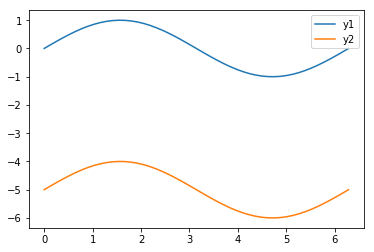

In [5]:
plt.plot(x1, y1, x1, y2)
plt.legend(['y1', 'y2'])
mae = metric.RMSE()
mae.update(preds=Y1, labels=Y2)
mae.get()

# RMSE between Y1, Y3

('rmse', 0.7014061808586121)

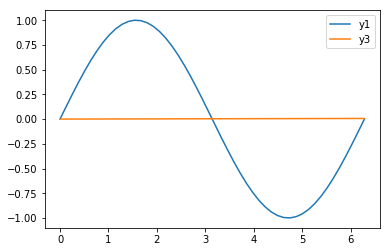

In [6]:
plt.plot(x1, y1, x1, y3)
plt.legend(['y1', 'y3'])
mae = metric.RMSE()
mae.update(preds=Y1, labels=Y3)
mae.get()

# Pearson Correlation between Y1 and Y2

('pearsonr', 0.9999999999999806)

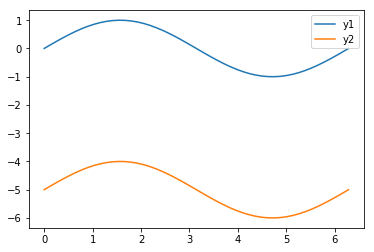

In [7]:
plt.plot(x1, y1, x1, y2)
plt.legend(['y1', 'y2'])
pc = metric.PearsonCorrelation()
pc.update(preds=Y1, labels=Y2)
pc.get()

# Pearson Correlation between Y1 and Y3

('pearsonr', -0.7555376286574912)

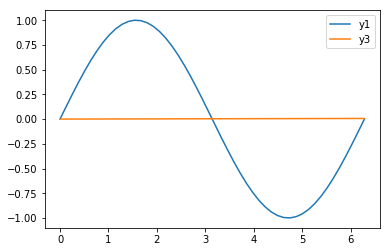

In [8]:
plt.plot(x1, y1, x1, y3)
plt.legend(['y1', 'y3'])
pc1 = metric.PearsonCorrelation()
pc1.update(preds=Y1, labels=Y3)
pc1.get()

In [9]:
gaussian_nose = nd.random_normal(loc=0, scale=.2, shape=Y1.shape)
Y4 = Y1 + gaussian_nose

# RMSE & Pearson Correlation between Y1 and Y4

(('rmse', 0.24821846187114716), ('pearsonr', 0.9464157502670973))

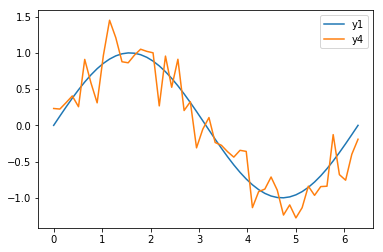

In [10]:
plt.plot(x1, y1, x1, Y4.asnumpy())
plt.legend(['y1', 'y4'])
mae = metric.RMSE()
mae.update(preds=Y1, labels=Y4)
pc = metric.PearsonCorrelation()
pc.update(preds=Y1, labels=Y4)
(mae.get(), pc.get())